### Calculating the optical image

The transformation of scene spectral radiance to the retinal spectral irradiance is managed by the oiCompute function.  These takes a scene as an input and produces the retinal irradiance.  There are two basic calculations implemented in ISETBIO for this transformation.  The first is a model based on diffraction limited (ideal) optics. The second is a model based on estimation of the human eye's optics.

The ISETBIO implementation for both of these methods is shift-invariant.  They can be described as a wavelength-depending blur function applied to the scene.  The ISETBIO calculations manage the geometry and keep the units straight, as we pass from the scene position to the retinal position.

There is one important limitation in the ISETBIO calculations at present.  Mostly, we treat the scene radiance image as if all the points are far enough away to be considered 'at infinity' for the optics. Thus, the basic calculations you will see here have no depth of field.  In fact, we can do better and there are some scripts that show how to do this.  But for the present, stick with the simple model.  The scene is effectively a plane that is in best focus at the focal length of the optics.  


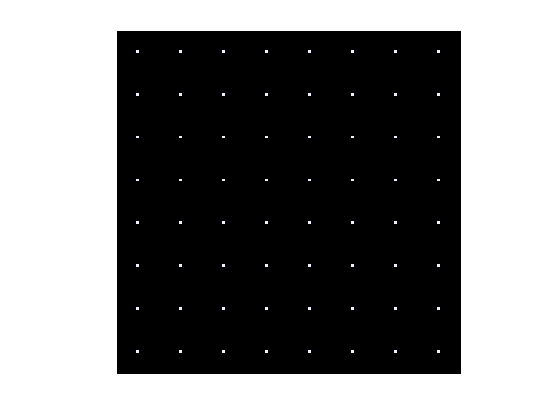

[Warning: MATLAB has disabled some advanced graphics rendering features by
switching to software OpenGL. For more information, click <a
href="matlab:opengl('problems')">here</a>.]


In [1]:
ieInit;

% Make a scene and show it
scene = sceneCreate('point array');   
scene = sceneSet(scene,'hfov',0.5);  
sceneShowImage(scene);

In [8]:
% Here is a text description of the scene geometry
str = sceneDescription(scene);
disp(str)

Name:	pointarray
(Row,Col):	128 by 128 
Hgt,Wdth	(10.47, 10.47) mm
Sample:	81.81 um 
Deg/samp: 0.00
Wave:	400:10:700 nm
DR: Inf
  (max 25600, min 0.00 cd/m2)


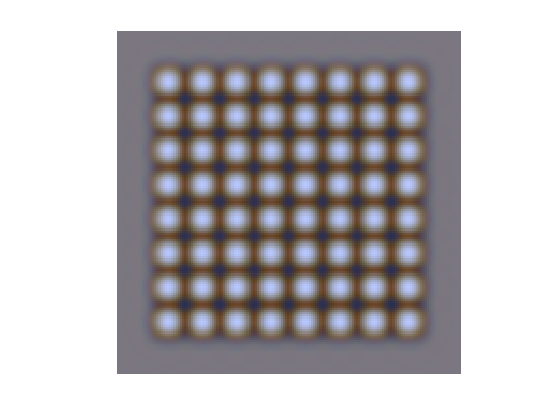

ans =


Optical image
  Size:       [160, 160] samples
  Hgt,wdth: [42.27, 42.27] um
  Sample:  0.26 um
  Wave:     400:10:700 nm
  Illum:       4.8 lux
Optics (DL)
  Mag:  0.00e+00
  Diameter:  0.97 mm


Fnumber: 4.000
Focal length 3.863 (mm)


In [3]:
% Diffraction limited optics
oi = oiCreate('diffraction'); 

% Compute optical image and show it
oi = oiCompute(scene,oi);

% Look at the image
oiShowImage(oi);

% Text description
oiDescription(oi)
fNumber = oiGet(oi,'optics fnumber');
fLength = oiGet(oi,'optics focal length','mm');
fprintf('Fnumber: %.3f\nFocal length %.3f (mm)\n', fNumber,fLength);

In [4]:
% We can try the same calculation with a smaller fnumber
oi = oiSet(oi,'optics fnumber',2);
oiGet(oi,'optics fnumber')

ans =

     2


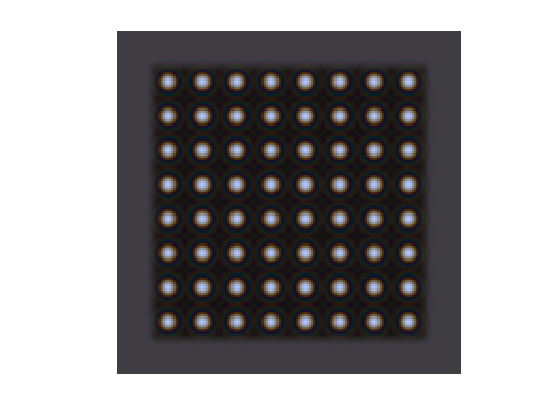

In [5]:
oi = oiCompute(oi,scene);
oiShowImage(oi);

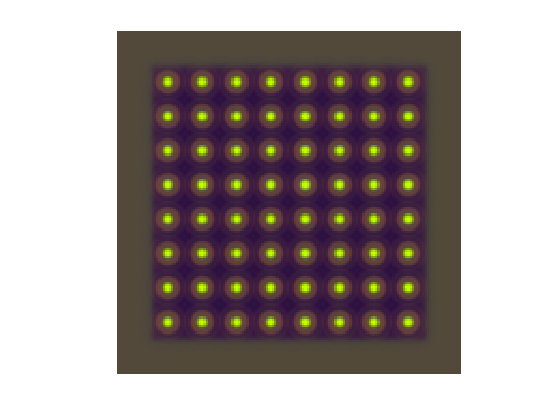

In [6]:
% Now, have a look at how different the retinal irradiance is for our best estimate of a real human eye
oi = oiCreate('wvf human');  % This is an estimate from Thibos
oi = oiCompute(oi,scene);
oiShowImage(oi);

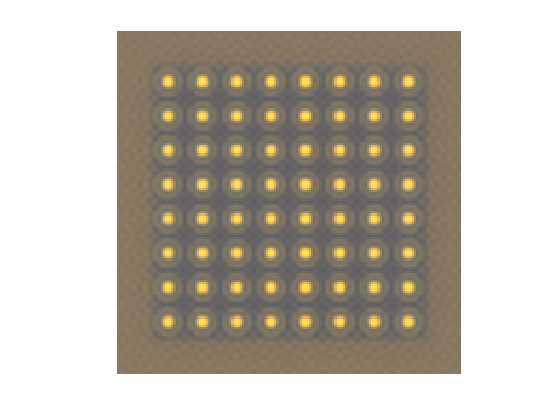

In [7]:
oi = oiCreate('mw human');  % This is the Marimont and Wandell model eye
oi = oiCompute(oi,scene);   % Similar but different

% Tells you something about the variation in humans and also the uncertainty in our field
oiShowImage(oi);
